# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [74]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lazaro cardenas
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | dudinka
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | cill airne
Processing Record 7 of Set 1 | lospalos
Processing Record 8 of Set 1 | cradock
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | nar'yan-mar
Processing Record 17 of Set 1 | puerto el triunfo
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | aoulef
Processing Record 21 of Set 1 | barcelos
Processing Record 22 of Set 1 | utrik
Processing Reco

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lazaro cardenas,17.9583,-102.2000,70.03,75,23,3.83,MX,1738322074
1,lihue,21.9789,-159.3672,72.99,78,0,23.02,US,1738322075
2,grytviken,-54.2811,-36.5092,48.47,75,94,16.80,GS,1738322076
3,dudinka,69.4058,86.1778,-8.05,97,100,14.00,RU,1738322077
4,puerto ayora,-0.7393,-90.3518,75.54,98,66,2.84,EC,1738322078


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/tatendamanenji/Desktop/Repos/Python-api-challenge/Output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("/Users/tatendamanenji/Desktop/Repos/Python-api-challenge/Output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lazaro cardenas,17.9583,-102.2000,70.03,75,23,3.83,MX,1738322074
1,lihue,21.9789,-159.3672,72.99,78,0,23.02,US,1738322075
2,grytviken,-54.2811,-36.5092,48.47,75,94,16.80,GS,1738322076
3,dudinka,69.4058,86.1778,-8.05,97,100,14.00,RU,1738322077
4,puerto ayora,-0.7393,-90.3518,75.54,98,66,2.84,EC,1738322078


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

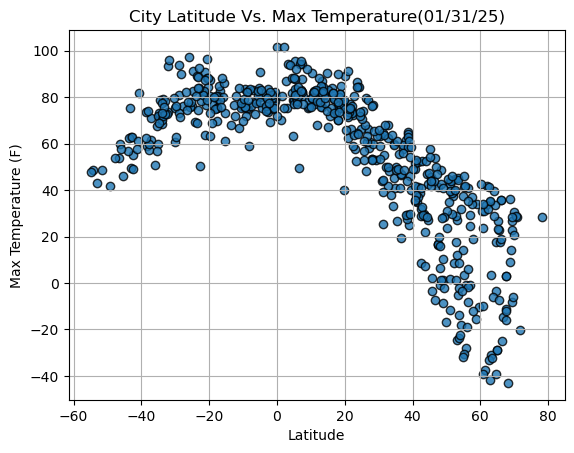

In [25]:

#Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/tatendamanenji/Desktop/Repos/Python-api-challenge/Output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

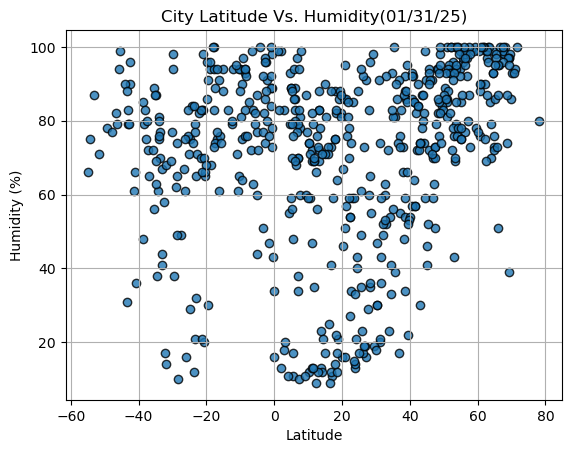

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/tatendamanenji/Desktop/Repos/Python-api-challenge/Output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

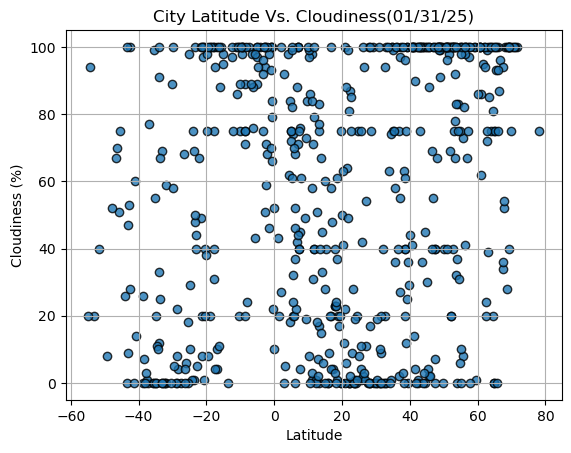

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("/Users/tatendamanenji/Desktop/Repos/Python-api-challenge/Output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

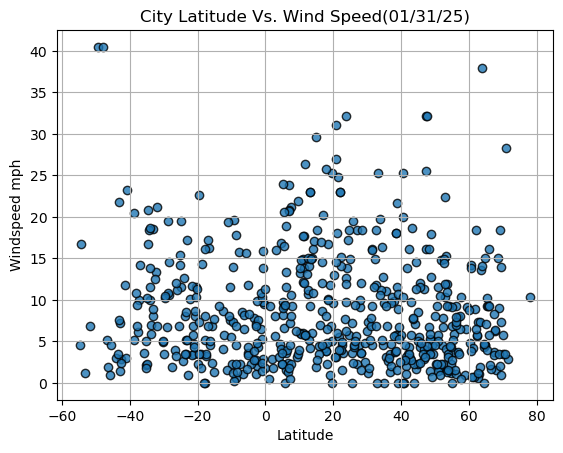

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/tatendamanenji/Desktop/Repos/Python-api-challenge/Output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample dat
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lazaro cardenas,17.9583,-102.2000,70.03,75,23,3.83,MX,1738322074
1,lihue,21.9789,-159.3672,72.99,78,0,23.02,US,1738322075
3,dudinka,69.4058,86.1778,-8.05,97,100,14.00,RU,1738322077
5,cill airne,52.0500,-9.5167,37.45,100,20,4.61,IE,1738322080
9,anadyr,64.7500,177.4833,-3.50,76,75,15.01,RU,1738322084


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,48.47,75,94,16.80,GS,1738322076
4,puerto ayora,-0.7393,-90.3518,75.54,98,66,2.84,EC,1738322078
6,lospalos,-8.5186,127.0025,74.71,93,89,0.58,TL,1738322081
7,cradock,-32.1642,25.6192,93.56,17,0,13.35,ZA,1738322082
8,port alfred,-33.5906,26.8910,79.18,77,25,7.00,ZA,1738322083


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8470853166579743
-----------------------------------


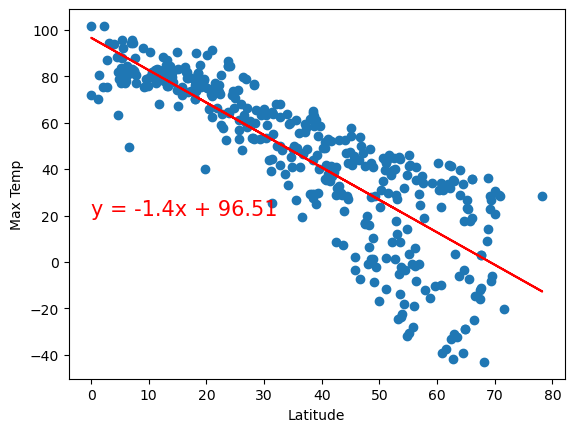

In [90]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")



The r-value is 0.5509873080577401
-----------------------------------


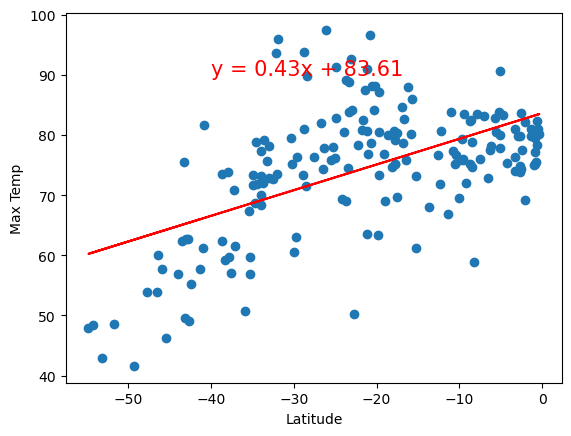

In [92]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-40,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** 

Northern Hemisphere,

There is a negative relationship between the latitude and the Maximum temperature in the Northern Hemisphere. As the distance from the equator  increases , the temperature decreases hence the negative linear relationship between the two. 

Southern Hemisphere

There is a slightly positive relationship between the latitude and the Maximum temperature in the Southern Hemisphere. As the distance from the equator  increases , there is a slight change in temperature  hence the slight positive linear relationship between the two. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4667709997606906
-----------------------------------


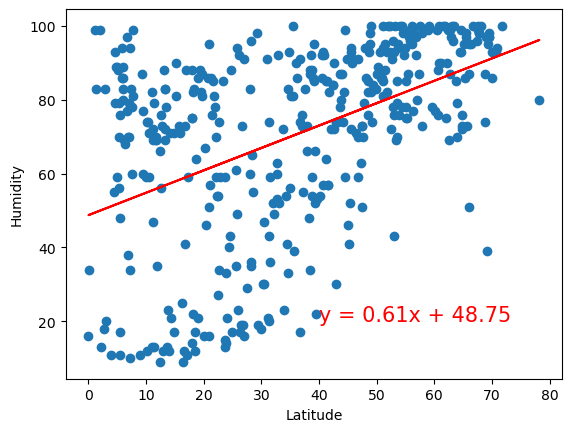

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

The r-value is 0.2058669113123397
-----------------------------------


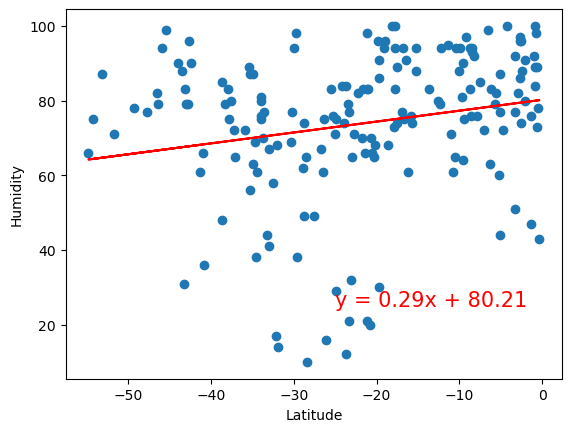

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** 

Northern Hemisphere,

There is a slightly positivelationship between the latitude and the Humidity  in the Northern Hemisphere. 

Southern Hemisphere

There is a slightly positive relationship between the latitude and the Humidity in the Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.3356384662006139
-----------------------------------


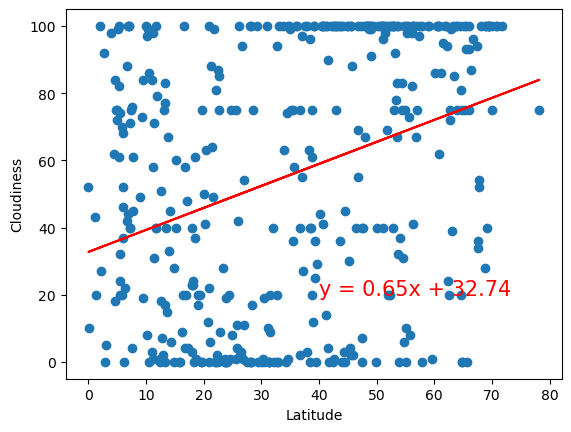

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

The r-value is 0.4878217112864001
-----------------------------------


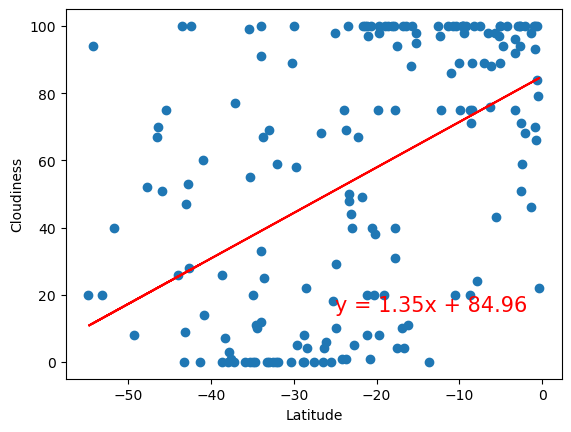

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** 

Northern Hemisphere,

There is no corelation between the latitude and the cloudiness  in the Northern Hemisphere. 

Southern Hemisphere

There is no corelation between the latitude and the cloudiness in the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.17067550265269826
-----------------------------------


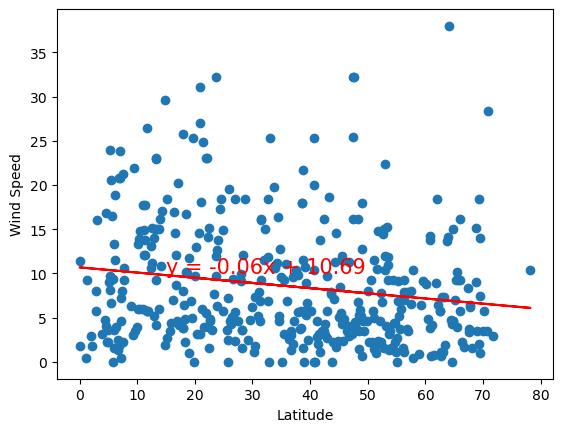

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

The r-value is -0.22081482558044158
-----------------------------------


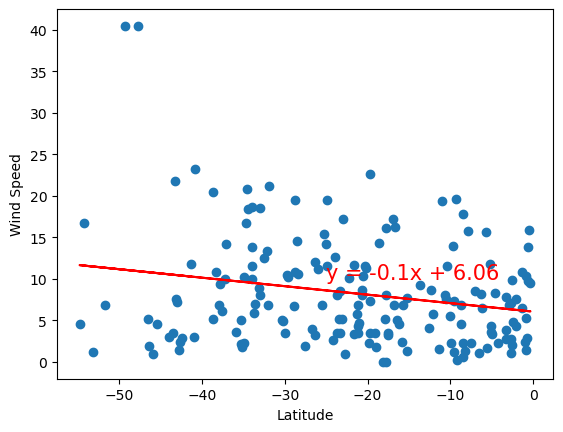

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** 

Northern Hemisphere,

There is no corelation between the latitude and the wind speed  in the Northern Hemisphere. 

Southern Hemisphere

There is no corelation between the latitude and the wind speed  in the Southern Hemisphere.